# The Trent Mesa Wind Farm

By: Nimrod Dvir

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

As I understand, the wind generation of a project depends on two topics. First, the potential ability of the project to capture the wind and turn it into electricity power, and second, well, the wind...

In the link provided in the exercise one can find some data files and an advanced interactive map of all the wind farm projects in the USA. From this map, and information on the web, I understand that the "Trent Mesa" project is a medium sized wind farm, located in Texas (the "Capital of Wind Farms"). It was developed and it is operated by established firms, and started operating in 2001, which makes it one of the veterans projects in the wind generation field. Sounds like a well-founded and reliable wind farm.

The above mentioned interactive map saves me a lot of data manipulations and the need to use the GeoJSON data. Yet, I'll use the "simple" (csv) data to gain few insights about where the "Trent Mesa" project is placed in comparison with the others in the country, regarding the first topic (the capacity of the project).

In this dataset each row is a turbine. I start with aggregating the turbines by project and showing the mean values per project. I look only at the explanatory columns (with the help of a codebook file that explains the meaning of the columns' headers that I've found), which for my opinion are: year project became operational, number of turbines in project, project capacity, turbine capacity, turbine hub height, turbine rotor diameter, turbine rotor swept area and turbine total height. Another super important attribute is the location, which, with the turbines' hights, relates to the second topic (potential wind), I'll refer to this subject later.

In [2]:
data = pd.read_csv(r'C:\Users\dvirn\Documents\Data Science\uswtdb_v2_3_20200109.csv')
data_by_project = data.dropna().groupby('p_name')
data_by_project = data_by_project['p_year','p_tnum','p_cap','t_cap','t_hh','t_rd','t_rsa','t_ttlh'].aggregate(np.mean)
data_by_project

,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh
p_name,,,,,,,,
AMP-Ohio/Green Mountain Energy Wind Farm,2004.0,2.0,3.60,1800.000000,78.0,80.0,5026.55,118.000000
Agassiz Beach,2001.0,3.0,1.98,773.333333,64.0,47.0,1734.94,88.433333
Air Force (Barnstable),2009.0,1.0,1.50,1500.000000,80.0,77.0,4656.63,118.600000
Allegheny Ridge,2007.0,40.0,80.00,2000.000000,78.0,87.0,5944.68,121.566667
Alta I,2010.0,100.0,150.00,1500.000000,80.0,77.0,4656.63,118.600000
...,...,...,...,...,...,...,...,...
Wolf,2006.0,5.0,6.25,1250.000000,75.0,64.0,3216.99,107.000000
Wolf Ridge,2008.0,75.0,112.50,1500.000000,80.0,82.5,5345.62,121.300000
Woodstock,1999.0,17.0,10.20,600.000000,60.0,44.0,1520.53,82.000000


There are three projects with "Trent Mesa" in their name:
* "Trent Mesa", 83 turbines, started operating in 2001.
* "Trent Mesa Repower", 14 or 17 turbines, depends on the source (in the dataset seperated to two groups of 14 and 3), 2001.
* "South Trent Mesa", 44 turbines, 2009.

All three are located in the same site.

In [3]:
data_by_project.loc[['Trent Mesa', 'Trent Mesa Repower', 'South Trent Mesa']]

,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh
p_name,,,,,,,,
Trent Mesa,2001.0,83.0,124.500,1500.0,65.0,70.5,3903.630,100.30
Trent Mesa Repower,2001.0,8.5,14.585,1745.0,80.0,101.5,8093.135,130.75
South Trent Mesa,2009.0,44.0,101.200,2300.0,80.0,84.2,5583.398,122.10


The official website of the "Trent Mesa Wind Farm" refers to an 100 turbines project. In addition for the fact that the first two projects are from the same year, I assume we suppose to relate to these two as the "Trent Mesa Wind Farm". Either way, I will relate to all three.

For better ability to visualize all the interesting attributes in the same scale I normalize the data:

In [5]:
data_by_project = (data_by_project - data_by_project.mean()) / data_by_project.std()
data_by_project

,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh
p_name,,,,,,,,
AMP-Ohio/Green Mountain Energy Wind Farm,-0.941675,-1.022769,-1.042634,0.225546,0.166249,0.038948,-0.066901,0.114712
Agassiz Beach,-1.652783,-0.999977,-1.065834,-1.576179,-1.211757,-2.002761,-1.802158,-1.610774
Air Force (Barnstable),0.243506,-1.045560,-1.072708,-0.300932,0.363107,-0.146662,-0.261914,0.149727
Allegheny Ridge,-0.230567,-0.156691,0.051497,0.576531,0.166249,0.472038,0.417115,0.322859
Alta I,0.480542,1.210801,1.053972,-0.300932,0.363107,-0.146662,-0.261914,0.149727
...,...,...,...,...,...,...,...,...
Wolf,-0.467603,-0.954394,-1.004683,-0.739664,-0.129038,-0.950972,-1.020857,-0.527239
Wolf Ridge,0.006469,0.641013,0.516932,-0.300932,0.363107,0.193623,0.101305,0.307297
Woodstock,-2.126856,-0.680896,-0.948115,-1.880366,-1.605472,-2.188371,-1.915190,-1.986218


Obviously, some of the attributes we are looking at influence others, even more so, are calculated from others. Let's use a correlation matrix to outline these dependency connections, and by that to find out which columns are redundant and which help us to understand the project potential:

In [6]:
corr = data_by_project.corr()
corr.style.background_gradient(cmap='coolwarm')

,p_year,p_tnum,p_cap,t_cap,t_hh,t_rd,t_rsa,t_ttlh
p_year,1,-0.0103294,0.231759,0.563133,0.640678,0.730207,0.716032,0.723993
p_tnum,-0.0103294,1,0.875383,-0.0650536,0.0139893,0.0144777,0.00820017,0.0151246
p_cap,0.231759,0.875383,1,0.263998,0.236592,0.318337,0.313218,0.290373
t_cap,0.563133,-0.0650536,0.263998,1,0.627785,0.867837,0.8592,0.781369
t_hh,0.640678,0.0139893,0.236592,0.627785,1,0.760735,0.718827,0.952199
t_rd,0.730207,0.0144777,0.318337,0.867837,0.760735,1,0.988698,0.922563
t_rsa,0.716032,0.00820017,0.313218,0.8592,0.718827,0.988698,1,0.892238
t_ttlh,0.723993,0.0151246,0.290373,0.781369,0.952199,0.922563,0.892238,1


Some insights:
* The project capacity depends mostly on the number of turbines in the project (and surprisingly, very little on the mean capacity of turbines in the project).
* A turbine's total height is calculated from the turbine's hub hight and rotor diameter, we can ommit this attribute.
* A turbine's rotor swept area almost completely depenends on it's rotor diameter, so it's also redundant.
* A turbine's capacity is strongly correlated to it's rotor diameter and firmly correlated to it's height.
* With the years (and technology), turbines became higher, with bigger rotors and increased capacity.

In [46]:
data_by_project = data_by_project[['p_year','p_tnum', 'p_cap','t_cap','t_hh','t_rd']]

Regarding these attributes, where are the "Trent Mesa" projects in comparison to all other projects?

In the next plot the "Trent Mesa" is marked by a brown star, "Trent Mesa Repower" by an an orange circle, and "South Trent Mesa" by a red X.

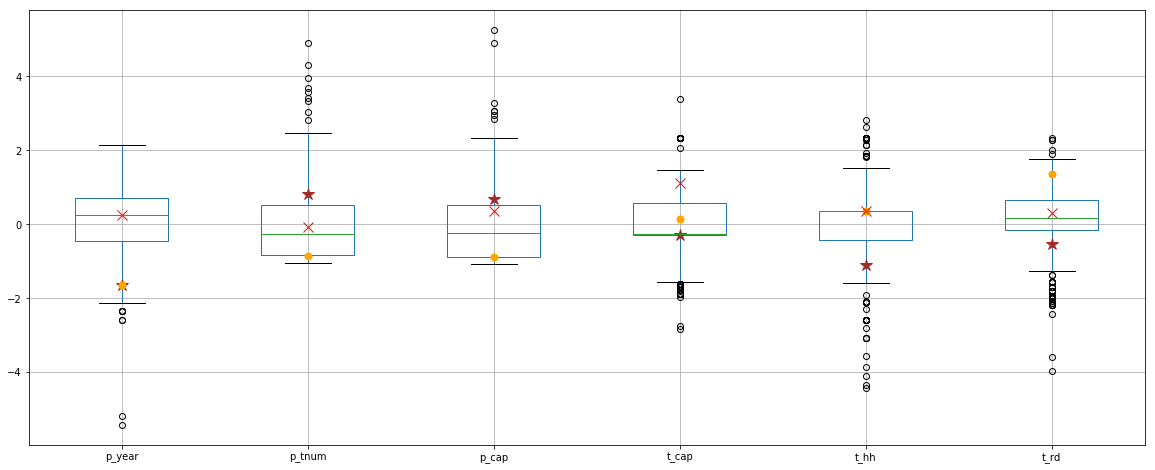

In [47]:
fig = plt.figure(1, figsize=(20,8))
data_by_project.boxplot(column=['p_year','p_tnum','p_cap','t_cap','t_hh','t_rd'])
plt.plot(range(1,7), data_by_project.loc['Trent Mesa'], marker='*', markersize=13, color="brown", ls='')
plt.plot(range(1,7), data_by_project.loc['Trent Mesa Repower'], marker='o', markersize=7, color="orange", ls='')
plt.plot(range(1,7), data_by_project.loc['South Trent Mesa'], marker='x', markersize=10, color="red", ls='')
plt.show()

We can see that despite the low values in the turbine related parameters, the "Trent Mesa" project has a pretty high capacity, due to a high number of turbines. The opposite observation is true for the "Trent Mesa Repower" project. I guess that this combination between these two complementary projects was done deliberately. It seems that the newer "South Trent Mesa" project came to take advantage of the good location (more about that in a second) with advanced, higher capacity, turbines.

Last, but not least, according to the average annual wind Speed at 80 meters (see attached map), these farms location was wisely chosen!

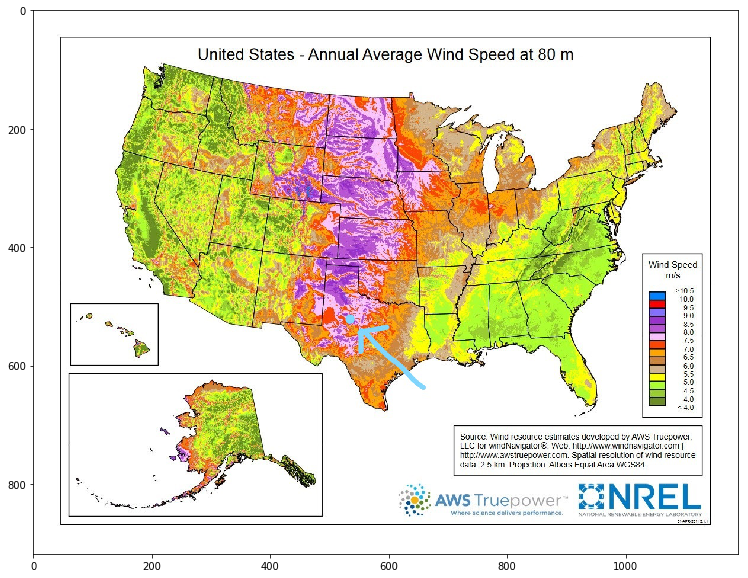

In [48]:
import matplotlib.image as mpimg
image = mpimg.imread(r'C:\Users\dvirn\Documents\Data Science\Inkedus_wind_map_LI.jpg')
plt.figure(figsize=(36,10))
plt.imshow(image)
plt.show()